## Main Task
> Predicting the net hourly electerical energy output of a plant!

## Data Understanding  

**1.0. What is the domain area of the dataset?**  
The dataset *Cycle_Powerplant* contains information combined cycle power plant collected over 6 years!

**1.1. Under which circumstances was it collected?**  
The data had been collected between 2006 - 2011 and when the power plant was set to work with full load!  

**2.0. Which data format?**  
The dataset has the *CSV* format!  

**2.1. Do the files have headers or another file describing the data?**  
Yes, the file has headers!  

**2.2. Are the data values separated by commas, semicolon, or tabs?**  
The data values are separated by commas;
Example: 
*Amgen Temperature,Exhaust Vaccum,Ambient Pressure,Relative Humidity,Energy*  
*14.96,41.76,1024.07,73.17,463.26*  

**3.0 How many features and how many observations does the dataset have?**  
The dataset has:  
* 5 features or columns!  
* 9568 observations or rows!  

**4.0 Does it contain numerical features? How many?**  
The dataset only contains numerical features, 5 numerical features!  

In [9]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:
powerPlant = pd.read_csv("../Datasets/Cycle_Powerplant.csv")
X = powerPlant.iloc[:, :-1].values
y = powerPlant.iloc[:, -1].values

### Basic Exploratory Data Analysis

#### Dataset's Features/Variables

**Amgen Temperature** (AT) in the range 1.81°C and 37.11°C!  
**Exhaust Vacuum** (EV) in teh range 25.36-81.56 cm Hg!  
**Ambient Pressure** (AP) in the range 992.89-1033.30 milibar!  
**Relative Humidity** (RH) in the range 25.56% to 100.16%!  
**Net hourly electrical energy** output (E) 420.26-495.76 MW!  

In [3]:
powerPlant.head()

,AT,EV,AP,RH,Energy
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
powerPlant.describe()

,AT,EV,AP,RH,Energy
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
print(f"Number of features in the dataset is {powerPlant.shape[1]} and the number of observations/rows in the dataset is {powerPlant.shape[0]}")

Number of features in the dataset is 5 and the number of observations/rows in the dataset is 9568


### Handling Missing Values

In [6]:
powerPlant.isnull().sum()

AT        0
EV        0
AP        0
RH        0
Energy    0
dtype: int64

In [7]:
powerPlant.isna().sum()

AT        0
EV        0
AP        0
RH        0
Energy    0
dtype: int64

### Correlation Between Variables

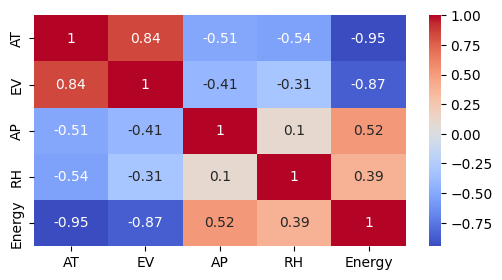

In [10]:
correlation_matrix = powerPlant.corr()

plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.show()

* A positive correlation indicates that as one variable increases, the other also increases!  
* A negative correlation indicates that as one variable increases, the other decreases!  
> However correlation does not imply causation!    

## Model Building

In [11]:
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [12]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


### Feature Scaling Needed

X- variables have different range, the one with a large range can influence more the model! 

> The goal is to ensure that all features have a similar scale so that no particular feature dominates others when a model is being trained!  

In [14]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

print(X)

[[-0.62951938 -0.98729659  1.8204884  -0.00951935]
 [ 0.74190911  0.68104512  1.1418628  -0.97462052]
 [-1.95129733 -1.17301765 -0.18507756  1.2898397 ]
 ...
 [ 1.56583973  1.57581141 -0.05709854 -2.52261812]
 [ 0.64797565  1.19177803  0.1011913  -0.74790051]
 [ 0.26150656  0.64641916  0.66867722 -0.37254534]]


**Before we scale** the *y* variable, we need to **reshape** it first because *StandardScaler* requires a **2D** array!  

In [15]:
y = y.reshape(len(y), 1)
print(y)

[[463.26]
 [444.37]
 [488.56]
 ...
 [429.57]
 [435.74]
 [453.28]]


In [16]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

print(y)

[[ 0.52120807]
 [-0.58566442]
 [ 2.00367889]
 ...
 [-1.45288056]
 [-1.09134518]
 [-0.06357687]]
